In [1]:
# Before running these commands, create a virtual environment (outside project directory) using python -m venv "dir_name/env_name"
%pip install deepxde
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
%pip install chart-studio
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import deepxde as dde
import numpy as np

In [19]:
geo = dde.geometry.Interval(-1, 1)
T = 0.05
def dU(x):
    print((4*(x**2 - 1)*(x)).shape)
    return 4*(x**2 - 1)*(x)

def committor(x, q):
    dq_x = dde.gradients.jacobian(q, x)
    dlap_q = dde.gradients.hessian(q, x, i=0, j=0)
    grad_U = dU(x)
    beta = 1 / T
    print((-1/beta * dlap_q + grad_U * dq_x).shape)
    return -1/beta * dlap_q + grad_U * dq_x


bc_a = dde.icbc.DirichletBC(geo, lambda x: 0.0, lambda x, on_boundary: x[0] <= -0.25)
bc_b = dde.icbc.DirichletBC(geo, lambda x: 1.0, lambda x, on_boundary: x[0] >= 0.25)


In [20]:
data = dde.data.pde.TimePDE(
    geo,
    committor, 
    [bc_a, bc_b], 
    num_domain=1000,
    num_boundary=2,
    num_test=500
)

In [15]:
net = dde.maps.FNN([1] + [64] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=2000)

Compiling model...
Building feed-forward neural network...
'build' took 0.111925 s

(None, 1)
(None, 1)
(None, 1)
(None, 1)
'compile' took 0.728789 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.24e-03, 1.50e-03, 1.07e+00]    [4.25e-03, 1.50e-03, 1.07e+00]    []  
1000      [4.87e-04, 5.61e-06, 6.51e-06]    [4.86e-04, 5.61e-06, 6.51e-06]    []  
2000      [4.00e-05, 9.94e-06, 1.06e-05]    [4.02e-05, 9.94e-06, 1.06e-05]    []  

Best model at step 2000:
  train loss: 6.06e-05
  test loss: 6.08e-05
  test metric: []

'train' took 34.934820 s



In [16]:
model.compile("L-BFGS-B")
losshistory, train_state=model.train()

Compiling model...
(None, 1)
(None, 1)
(None, 1)
(None, 1)
'compile' took 0.421533 s

Training model...

Step      Train loss                        Test loss                         Test metric
2000      [4.00e-05, 9.94e-06, 1.06e-05]    [4.02e-05, 9.94e-06, 1.06e-05]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  Objective function value: 0.000061
  Number of iterations: 1
  Number of functions evaluations: 36
2017      [4.00e-05, 9.94e-06, 1.06e-05]    [4.02e-05, 9.94e-06, 1.06e-05]    []  

Best model at step 2000:
  train loss: 6.06e-05
  test loss: 6.08e-05
  test metric: []

'train' took 1.029714 s



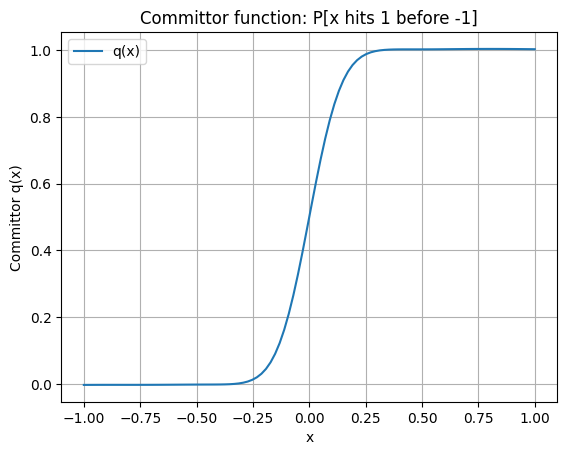

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

x = np.linspace(-1, 1, 100).reshape(-1, 1)
u_pred = model.predict(x)

plt.plot(x, u_pred, label="q(x)")
plt.xlabel("x")
plt.ylabel("Committor q(x)")
plt.title("Committor function: P[x hits 1 before -1]")
plt.grid(True)
plt.legend()
plt.show()
# OK plan stay up and look into this like there is no tomorrow